In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


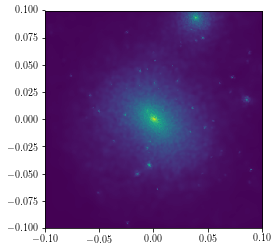

In [12]:
#This file contains a few lines as example of
#the use of py-sphviewer.

import h5py
from sphviewer.tools import QuickView

halo = h5py.File('/home/ornela/Escritorio/dm_halo.h5py', 'r')
pos  = halo['Coordinates'].value

qv = QuickView(pos.T, r='infinity', nb=8, plot=False)
qv.imshow()

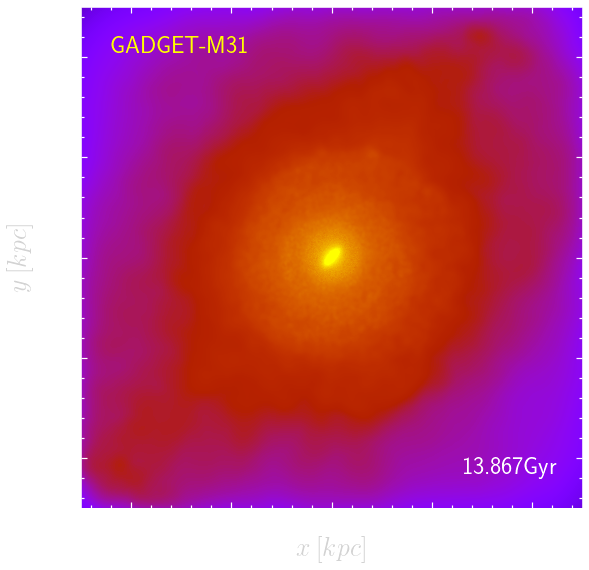

496


In [38]:
import h5py
import rotation as rot
import sphviewer as sph
import time_conversion as tiempo
from __future__ import unicode_literals
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------

aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

snapshot=range(496,495,-1) #SNAPSHOTS
i=0
for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    pstr = snap['subhalo_000/Str/Coordinates'].value
    mstr = snap['subhalo_000/Str/Masses'].value
    vstr = snap['subhalo_000/Str/Velocities'].value
    
#     pdrk = snap['subhalo_000/Drk/Coordinates'].value
#     mdrk = snap['subhalo_000/Drk/Masses'].value
#     vdrk  = snap['subhalo_000/Drk/Velocities'].value
    
#     pgas = snap['subhalo_000/Gas/Coordinates'].value
#     mgas = snap['subhalo_000/Gas/Masses'].value
#     vgas  = snap['subhalo_000/Gas/Velocities'].value
  
    z     = a0/aexp[isnap] - 1.
    Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time  = tiempo.conv(z, h, omega_lambda, omega_matter)
    
#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    
#     xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
#     ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
#     zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
#     rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
    
#     xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
#     ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
#     zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
#     rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
    
#paso las velocidades a unidades físicas
    vstr_x = vstr[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    vstr_y = vstr[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    vstr_z = vstr[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
    
#     vdrk_x = vdrk[:,0] *np.sqrt(aexp[isnap]) + Ht *xdrk/1000.
#     vdrk_y = vdrk[:,1] *np.sqrt(aexp[isnap]) + Ht *ydrk/1000.
#     vdrk_z = vdrk[:,2] *np.sqrt(aexp[isnap]) + Ht *zdrk/1000.
    
#     vgas_x = vgas[:,0] *np.sqrt(aexp[isnap]) + Ht *xgas/1000.
#     vgas_y = vgas[:,1] *np.sqrt(aexp[isnap]) + Ht *ygas/1000.
#     vgas_z = vgas[:,2] *np.sqrt(aexp[isnap]) + Ht *zgas/1000.


#masa a unidades físicas
    mstr = mstr/h     
#     mdrk = mdrk/h
#     mgas = mgas/h
    
    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    rgal = 0.15*r200          #defino el radio de la galaxia
    
    limit = np.where(rstr<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(rstr[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(rstr[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa

#-----------------------------------------------------------------------
#componentes de la velocidad del centro de masa
    veloc, = np.where(rstr < r50)
    
    vstr_xcm = sum(mstr[veloc]*vstr_x[veloc])/sum(mstr[veloc])
    vstr_ycm = sum(mstr[veloc]*vstr_y[veloc])/sum(mstr[veloc])
    vstr_zcm = sum(mstr[veloc]*vstr_z[veloc])/sum(mstr[veloc])
    
#     veloc2, = np.where(rdrk < r50)
    
#     vdrk_xcm = sum(mdrk[veloc2]*vdrk_x[veloc2])/sum(mdrk[veloc2])
#     vdrk_ycm = sum(mdrk[veloc2]*vdrk_y[veloc2])/sum(mdrk[veloc2])
#     vdrk_zcm = sum(mdrk[veloc2]*vdrk_z[veloc2])/sum(mdrk[veloc2])
    
#     veloc3, = np.where(rgas < r50)
    
#     vgas_xcm = sum(mgas[veloc3]*vgas_x[veloc3])/sum(mgas[veloc3])
#     vgas_ycm = sum(mgas[veloc3]*vgas_y[veloc3])/sum(mgas[veloc3])
#     vgas_zcm = sum(mgas[veloc3]*vgas_z[veloc3])/sum(mgas[veloc3])


#velocidades de las estrellas respecto del centro de masa de la galaxia
    vstrx = vstr_x - vstr_xcm
    vstry = vstr_y - vstr_ycm
    vstrz = vstr_z - vstr_zcm
    
#     vdrkx = vdrk_x - vdrk_xcm
#     vdrky = vdrk_y - vdrk_ycm
#     vdrkz = vdrk_z - vdrk_zcm
    
#     vgasx = vgas_x - vgas_xcm
#     vgasy = vgas_y - vgas_ycm
#     vgasz = vgas_z - vgas_zcm

#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular
    if isnap == 496:
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vstrx,vstry,vstrz,2*r50)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr
    vxn_str = e1x*vstrx + e1y*vstry + e1z*vstrz
    vyn_str = e2x*vstrx + e2y*vstry + e2z*vstrz
    vzn_str = e3x*vstrx + e3y*vstry + e3z*vstrz
    
#     xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
#     yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
#     zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk
#     vxn_drk = e1x*vdrkx + e1y*vdrky + e1z*vdrkz
#     vyn_drk = e2x*vdrkx + e2y*vdrky + e2z*vdrkz
#     vzn_drk = e3x*vdrkx + e3y*vdrky + e3z*vdrkz
    
#     xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
#     yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
#     zn_gas = e3x*xgas + e3y*ygas + e3z*zgas
#     vxn_gas = e1x*vgasx + e1y*vgasy + e1z*vgasz
#     vyn_gas = e2x*vgasx + e2y*vgasy + e2z*vgasz
#     vzn_gas = e3x*vgasx + e3y*vgasy + e3z*vgasz

#--------------------------------------------------------------------------
    pos_str = np.ndarray([3,np.size(xn_str)])
    pos_str[0,:] = xn_str
    pos_str[1,:] = yn_str
    pos_str[2,:] = zn_str
    
#     pos_drk = np.ndarray([3,np.size(xn_drk)])
#     pos_drk[0,:] = xn_drk
#     pos_drk[1,:] = yn_drk
#     pos_drk[2,:] = zn_drk

#---------------------generador del gráfico-----------------
    rl=25   
    corte,=np.where((xn_str<rl) & (yn_str<rl) & (zn_str<rl) & (xn_str>-rl) & (yn_str>-rl) & (zn_str>-rl))

#-----rango que tiene la escala  de colores-----
    vmin=1
    vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='gnuplot'

#-----grafico-----------
    fig=plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.98, top = 0.95, wspace=0.3, hspace= 0.1)

    particles=sph.Particles(pos_str[:,corte],mstr[corte]*1e10)#nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    rend.set_logscale()
#     extent=escena.get_extent()
    extent=rend.get_extent()
    

    ax1=fig.add_subplot(111)
    ax1.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    #ax1.set_xticklabels([])
    ax1.spines['bottom'].set_color('w')
    ax1.spines['top'].set_color('w')
    ax1.spines['left'].set_color('w')
    ax1.spines['right'].set_color('w')
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24, colors='lightgray')
    ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax1.set_facecolor('silver')
#     ax1.grid(color='w',linestyle=':',which='major')
    #ax1.grid(color='lightgray',linestyle=':',which='minor')
    ax1.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax1.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
    ax1.text(-22, 21,'GADGET-M31', fontsize=24, color='yellow', ha='left', va='center')
    ax1.text(18,-20, str('%.3f'%time)+'Gyr', fontsize=24, color='white', ha='center', va='top') 
             #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
    #plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
    #              ha='center', va='center', 
    #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))

    #plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')


#     particles=sph.Particles(pos_str[:,corte], mstr[corte]*1e10)
#     escena=sph.Scene(particles)
#     escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
#     rend=sph.Render(escena)
#     extent=escena.get_extent()
#     rend.set_logscale()

#     ax2=fig.add_subplot(222)
#     ax2.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
#     #plt.axis('off')
#     ax2.spines['bottom'].set_color('w')
#     ax2.spines['top'].set_color('w')
#     ax2.spines['left'].set_color('w')
#     ax2.spines['right'].set_color('w')
#     ax2.minorticks_on()
#     ax2.tick_params( labelsize=24, colors='lightgray')
#     ax2.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax2.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax2.set_facecolor('silver')
# #     ax2.grid(color='w',linestyle=':',which='major')
#     #ax2.grid(color='lightgray',linestyle=':',which='minor')
#     ax2.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
#     ax2.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 


#     particles=sph.Particles(pos_str[:,corte],mstr[corte]*1e10)
#     escena=sph.Scene(particles)
#     escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, p=90)
#     rend=sph.Render(escena)
#     extent=escena.get_extent()
#     rend.set_logscale()

#     ax3=fig.add_subplot(223)
#     ax3.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
#     #plt.axis('off')
#     ax3.spines['bottom'].set_color('w')
#     ax3.spines['top'].set_color('w')
#     ax3.spines['left'].set_color('w')
#     ax3.spines['right'].set_color('w')
#     ax3.minorticks_on()
#     ax3.tick_params( labelsize=24, colors='lightgray')
#     ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax3.set_facecolor('silver')
# #     ax3.grid(color='w',linestyle=':',which='major')
#     #ax3.grid(color='lightgray',linestyle=':',which='minor')
#     ax3.set_xlabel(r'$y\:[kpc]$', fontsize=26, color='lightgray')
#     ax3.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 

#     fig.savefig('/home/ornela/python/salida/M31_str_rz0/M31_'+str('%s'%isnap)+'.png', 
#                 facecolor= 'k', frameon= 'True', dpi = 100)
    plt.show()
#     plt.clf()

    print isnap
    i += 1